# Project 1 Code


In [153]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [154]:
# Read in State of Utah population data from 2017-2021 and concatinate into one dataframe. 
df1 = pd.read_csv('source_data\pop_y17.csv')
df2 = pd.read_csv('source_data\pop_y18.csv')
df3 = pd.read_csv('source_data\pop_y19.csv')
df4 = pd.read_csv('source_data\pop_y20.csv')
df5 = pd.read_csv('source_data\pop_y21.csv')

pop_df = pd.concat([df1, df2, df3, df4, df5], axis=0)



pop_df.head()

,Area,Year,Population,Births,Deaths,Natural Increase,Net Migration,Annual Change,Annual Change Rate
0,Statewide,2017,3122477,49494,17596,31898,28195,60093,2.0
0,Statewide,2018,3176342,47310,17894,29416,24448,53864,1.7
0,Statewide,2019,3231108,47115,18540,28575,26191,54766,1.7
0,Statewide,2020,3284823,46510,18937,27573,26142,53715,1.7
0,Statewide,2021,3343552,45639,21768,23871,34858,58729,1.8


In [155]:
#Create variables for each CSV file in the State of Utah employment/wages soure data.
data_2017 = "source_data/industry_Statewide_2017.csv"
data_2018 = "source_data/industry_Statewide_2018.csv"
data_2019 = "source_data/industry_Statewide_2019.csv"
data_2020 = "source_data/industry_Statewide_2020.csv"
data_2021 = "source_data/industry_Statewide_2021.csv"

# Load the data for each year into a dataframe.
df_2017 = pd.read_csv(data_2017)
df_2018 = pd.read_csv(data_2018)
df_2019 = pd.read_csv(data_2019)
df_2020 = pd.read_csv(data_2020)
df_2021 = pd.read_csv(data_2021)

# Add suffix to each column name to indicate the year for all but the Indusrty Sector column so I can join all tables...
# on Industry Sector.
df_2017 = df_2017.rename(columns={col: col + '_2017' for col in df_2017.columns if col != 'Industry Sector'})
df_2018 = df_2018.rename(columns={col: col + '_2018' for col in df_2018.columns if col != 'Industry Sector'})
df_2019 = df_2019.rename(columns={col: col + '_2019' for col in df_2019.columns if col != 'Industry Sector'})
df_2020 = df_2020.rename(columns={col: col + '_2020' for col in df_2020.columns if col != 'Industry Sector'})
df_2021 = df_2021.rename(columns={col: col + '_2021' for col in df_2021.columns if col != 'Industry Sector'})

# Merge 2017 and 2018 tables using the Industry Sector common column.
merged_df = pd.merge(df_2017, df_2018, on='Industry Sector', how='outer')

# Merge 2019 table with the merged 2017-2018 table using the Industry Sector common column.
merged_df = pd.merge(merged_df, df_2019, on='Industry Sector', how='outer')

# Merge 2020 table with the merged 2017-2019 table using the Industry Sector common column.
merged_df = pd.merge(merged_df, df_2020, on='Industry Sector', how='outer')

# Merge 2021 table with the merged 2017-2020 table using the Industry Sector common column.
merged_df = pd.merge(merged_df, df_2021, on='Industry Sector', how='outer')

# Write the merged_df dataframe to a new CSV file.
merged_df.to_csv('merged_table.csv', index=False)



merged_df.head()

,Industry Sector,NAICS Sector_2017,Average Employment_2017,Estblishments_2017,Payroll_2017,Average Monthly Wage_2017,NAICS Sector_2018,Average Employment_2018,Estblishments_2018,Payroll_2018,...,NAICS Sector_2020,Average Employment_2020,Estblishments_2020,Payroll_2020,Average Monthly Wage_2020,NAICS Sector_2021,Average Employment_2021,Estblishments_2021,Payroll_2021,Average Monthly Wage_2021
0,"Agriculture, Forestry, Fishing & Hunting",11.0,4317.0,425.0,143233985.0,2765.0,11,4359,401,154962587,...,11,4658,457,181089010,3240,11,4723,482,182945139,3228
1,Crop Production,111.0,825.0,97.0,20736031.0,2094.0,111,846,91,25046082,...,111,988,110,29888721,2522,111,920,110,28448921,2577
2,Animal Production and Aquaculture,112.0,2662.0,222.0,87322697.0,2733.0,112,2607,212,89199730,...,112,2669,227,102689744,3206,112,2775,245,107142829,3218
3,Forestry and Logging,113.0,26.0,5.0,1007647.0,3293.0,113,25,5,1119308,...,113,34,6,1413075,3438,113,28,8,1093942,3315
4,"Fishing, Hunting and Trapping",114.0,182.0,10.0,11945619.0,5485.0,114,167,10,13086656,...,114,180,10,16556869,7687,114,189,11,13932714,6135


In [156]:
# Filter out unnecessary industry sector sub-categories so we are left with only the main industry sector categories.
cols_to_filter = ['Industry Sector',
                 'NAICS Sector_2017',
                 'NAICS Sector_2018',
                 'NAICS Sector_2019',
                 'NAICS Sector_2020',
                 'NAICS Sector_2021']

filtered_df = merged_df
mask = ~filtered_df[cols_to_filter].astype(str).apply(lambda x: x.str.contains(r'\b\d{3}\b')).any(axis=1)
filtered_df = filtered_df.loc[mask]

# Write the filtered_df dataframe to a new CSV file.
filtered_df.to_csv('filtered_table.csv', index=False)



filtered_df.head()

,Industry Sector,NAICS Sector_2017,Average Employment_2017,Estblishments_2017,Payroll_2017,Average Monthly Wage_2017,NAICS Sector_2018,Average Employment_2018,Estblishments_2018,Payroll_2018,...,NAICS Sector_2020,Average Employment_2020,Estblishments_2020,Payroll_2020,Average Monthly Wage_2020,NAICS Sector_2021,Average Employment_2021,Estblishments_2021,Payroll_2021,Average Monthly Wage_2021
0,"Agriculture, Forestry, Fishing & Hunting",11.0,4317.0,425.0,1.432340e+08,2765.0,11,4359,401,154962587,...,11,4658,457,181089010,3240,11,4723,482,182945139,3228
6,Mining,21.0,8619.0,551.0,6.602903e+08,6384.0,21,9471,548,732794165,...,21,8660,557,737158365,7094,21,8822,544,734783451,6941
10,Utilities,22.0,6220.0,383.0,5.133841e+08,6878.0,22,6268,384,543382517,...,22,6095,393,556552043,7610,22,6004,406,538212330,7470
42,Construction,23.0,98686.0,10955.0,4.847802e+09,4094.0,23,105535,11643,5386215008,...,23,116661,13012,6697376794,4784,23,123605,13895,7457881054,5028
46,Manufacturing (31-33),31.0,129231.0,4251.0,7.303308e+09,4709.0,31,132987,4390,7686603635,...,31,136413,4622,8399961354,5131,31,145621,4893,9513723329,5444


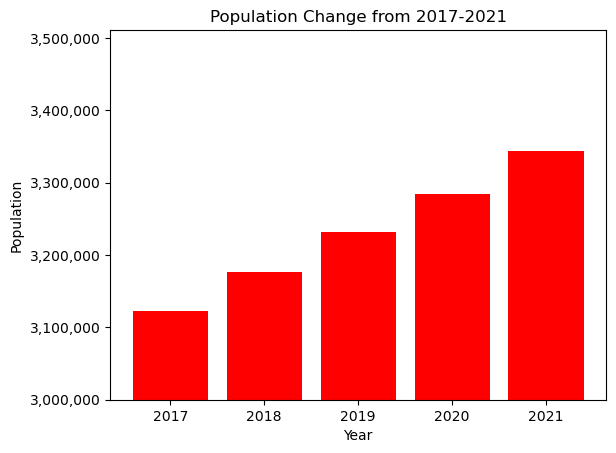

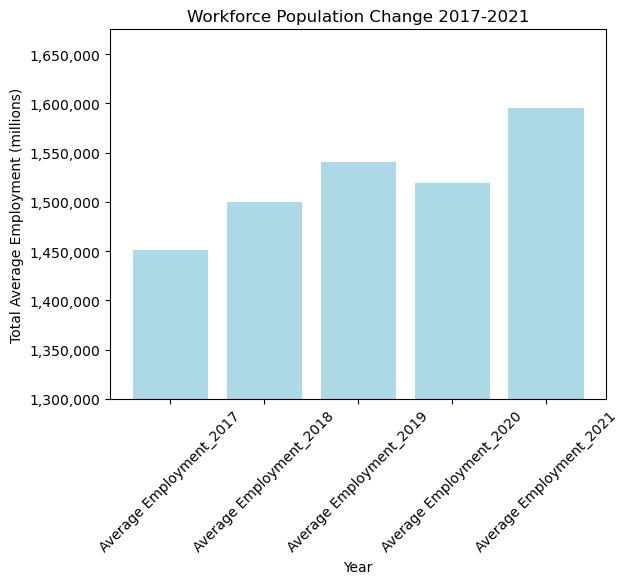

In [157]:
# Create a bar graph to show population change over time.
df = pop_df
plt.bar(df['Year'], df['Population'],color='r')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Change from 2017-2021')
# Set y-axis lower limit to 3 million.
plt.gca().set_ylim(bottom=3000000)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))



plt.show()



# Create a list of columns to sum. Wanting to find the sum of the average workforce for each year. 
totals_df = filtered_df[[
                      'Average Employment_2017', 
                      'Average Employment_2018', 
                      'Average Employment_2019',
                      'Average Employment_2020',
                      'Average Employment_2021'
                      ]].sum()

# Create a bar graph for the above sum columns (workforce growth over time).
plt.bar(totals_df.index, totals_df.values, color='#ADD8E6')
plt.xticks(totals_df.index, totals_df.index.astype(str))
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Total Average Employment (millions)')
plt.title('Workforce Population Change 2017-2021')
# Set y-axis lower limit to 1.3 million.
plt.ylim(1.3e6, plt.ylim()[1])
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))



plt.show()

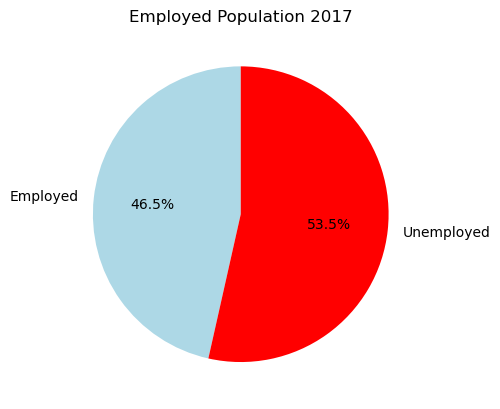

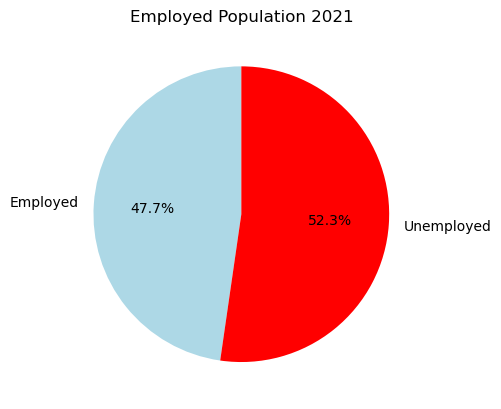

In [158]:
# Create variables to be used for our percent population employed vs. unepmployed pie charts. 
total_population_2017 = pop_df[pop_df['Year'] == 2017]['Population'].sum()
total_population_2021 = pop_df[pop_df['Year'] == 2021]['Population'].sum()

employment_percentage_2017 = (totals_df['Average Employment_2017'] / total_population_2017) * 100
employment_percentage_2021 = (totals_df['Average Employment_2021'] / total_population_2021) * 100



# Create a pie chart for percent of population employed vs. unemployed for 2017.
labels = ['Employed', 'Unemployed']
sizes = [employment_percentage_2017, 100 - employment_percentage_2017]
colors = ['#ADD8E6', 'r']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Employed Population 2017')



plt.show()




# Create a pie chart for percent of population employed vs. unemployed for 2021.
labels = ['Employed', 'Unemployed']
sizes = [employment_percentage_2021, 100 - employment_percentage_2021]
colors = ['#ADD8E6', 'r']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Employed Population 2021')



plt.show()

In [159]:
# Make a copy of the filtered_df dataframe for the next steps in our script.
filtered_df_copy = filtered_df.copy()

# Calculate percentage change in average employment from 2017 to 2021 for each industry sector.
filtered_df_copy['2017'] = 0
filtered_df_copy['2017-2018'] = ((filtered_df_copy['Average Employment_2018'] - filtered_df_copy['Average Employment_2017']) / filtered_df_copy['Average Employment_2017']) * 100
filtered_df_copy['2017-2019'] = ((filtered_df_copy['Average Employment_2019'] - filtered_df_copy['Average Employment_2017']) / filtered_df_copy['Average Employment_2017']) * 100
filtered_df_copy['2017-2020'] = ((filtered_df_copy['Average Employment_2020'] - filtered_df_copy['Average Employment_2017']) / filtered_df_copy['Average Employment_2017']) * 100
filtered_df_copy['2017-2021'] = ((filtered_df_copy['Average Employment_2021'] - filtered_df_copy['Average Employment_2017']) / filtered_df_copy['Average Employment_2017']) * 100



# Sort the sectors by their percentage change in descending order so we can find the top 3 sectors with the greatest change.
top_3_sectors =filtered_df_copy.sort_values('2017-2021', ascending=False).head(4)['Industry Sector'].tolist()



# Filter the DataFrame to include only the top 3 industry sectors.
filtered_df_top3 = filtered_df_copy[filtered_df_copy['Industry Sector'].isin(top_3_sectors) & (filtered_df_copy['Industry Sector'] != 'Unclassified establishments')]



filtered_df_top3

,Industry Sector,NAICS Sector_2017,Average Employment_2017,Estblishments_2017,Payroll_2017,Average Monthly Wage_2017,NAICS Sector_2018,Average Employment_2018,Estblishments_2018,Payroll_2018,...,NAICS Sector_2021,Average Employment_2021,Estblishments_2021,Payroll_2021,Average Monthly Wage_2021,2017,2017-2018,2017-2019,2017-2020,2017-2021
42,Construction,23.0,98686.0,10955.0,4.847802e+09,4094.0,23,105535,11643,5386215008,...,23,123605,13895,7457881054,5028,0,6.940194,12.219565,18.214336,25.250795
107,Real Estate and Rental and Leasing,53.0,19725.0,5275.0,9.586025e+08,4050.0,53,20773,5579,1048340262,...,53,23003,6680,1404474895,5088,0,5.313054,10.615970,11.244613,16.618504
111,Professiona.l Scientific & Technical Svc,54.0,96233.0,15226.0,6.784456e+09,5875.0,54,105050,16025,7771185465,...,54,119941,20472,10707876578,7440,0,9.162138,14.123014,17.691436,24.636040


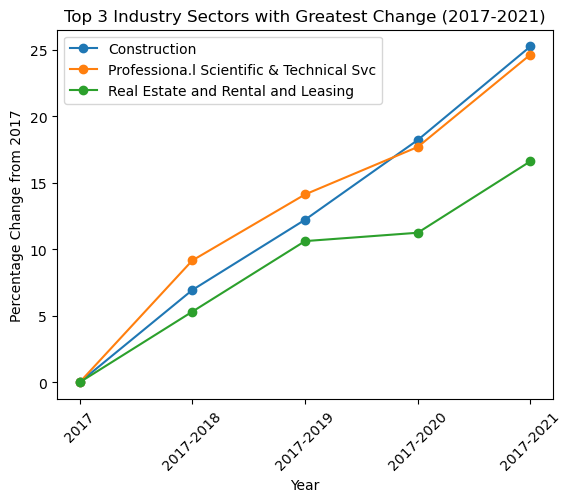

In [160]:
# MAKE GRAPH FOR TOP 3 INDUSTRY SECTOR PERCENT CHANGE OVER TIME.
grouped_df = filtered_df_top3.groupby('Industry Sector').mean()[['2017', '2017-2018', '2017-2019', '2017-2020', '2017-2021']]

# Transpose the dataframe to have years as columns and sectors as rows.
grouped_df = grouped_df.T

# Create a line plot for each sector with dots as markers.
for sector in grouped_df.columns:
    plt.plot(grouped_df.index, grouped_df[sector], marker='o', label=sector)


plt.xlabel('Year')
plt.ylabel('Percentage Change from 2017')
plt.title('Top 3 Industry Sectors with Greatest Change (2017-2021)')
plt.legend()
plt.xticks(rotation=45)



plt.show()

In [161]:
# Sort the sectors by their percentage change in descending order so we can find the top 3 sectors with the lowest change.
bottom_3_sectors =filtered_df_copy.sort_values('2017-2021', ascending=True).head(3)['Industry Sector'].tolist()



# Filter the DataFrame to include only the bottom 3 industry sectors.
filtered_df_bottom3 = filtered_df_copy[filtered_df_copy['Industry Sector'].isin(bottom_3_sectors)]



filtered_df_bottom3

,Industry Sector,NAICS Sector_2017,Average Employment_2017,Estblishments_2017,Payroll_2017,Average Monthly Wage_2017,NAICS Sector_2018,Average Employment_2018,Estblishments_2018,Payroll_2018,...,NAICS Sector_2021,Average Employment_2021,Estblishments_2021,Payroll_2021,Average Monthly Wage_2021,2017,2017-2018,2017-2019,2017-2020,2017-2021
10,Utilities,22.0,6220.0,383.0,5.133841e+08,6878.0,22,6268,384,543382517,...,22,6004,406,538212330,7470,0,0.771704,-0.241158,-2.009646,-3.472669
96,Information,51.0,17806.0,1185.0,9.061867e+08,4241.0,51,17513,1250,939241140,...,51,17171,1742,1364398139,6622,0,-1.645513,-4.217679,-11.973492,-3.566214
148,Education Services,61.0,165938.0,2658.0,5.931055e+09,2979.0,61,169018,2747,6336627847,...,61,169245,3150,7765032981,3823,0,1.856115,4.189517,0.248888,1.992913


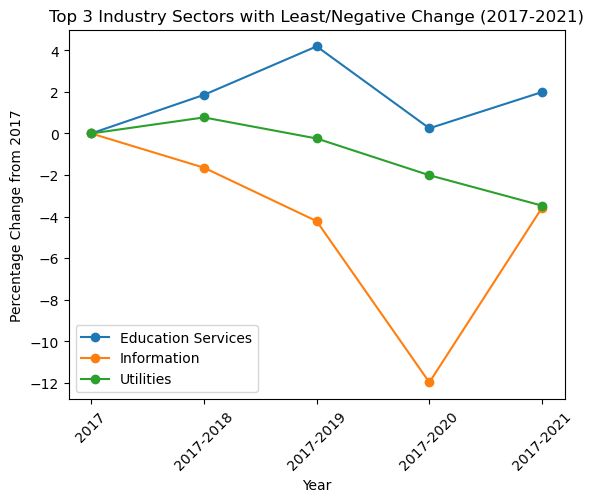

In [162]:
#MAKE GRAPH FOR BOTTOM 3 INDUSTRY SECTOR PERCENT CHANGE OVER TIME.
grouped_df = filtered_df_bottom3.groupby('Industry Sector').mean()[['2017', '2017-2018', '2017-2019', '2017-2020', '2017-2021']]

# Transpose the dataframe to have years as columns and sectors as rows.
grouped_df = grouped_df.T

# Create a line plot for each sector with dots as markers.
for sector in grouped_df.columns:
    plt.plot(grouped_df.index, grouped_df[sector], marker='o', label=sector)

plt.xlabel('Year')
plt.ylabel('Percentage Change from 2017')
plt.title('Top 3 Industry Sectors with Least/Negative Change (2017-2021)')
plt.legend()
plt.xticks(rotation=45)



plt.show()